In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주특별자치도의 성별 분포를 항아리 모양 그래프로 표현

찾고 싶은 지역의 이름을 알려주세요 : 서울특별시


<function matplotlib.pyplot.show>

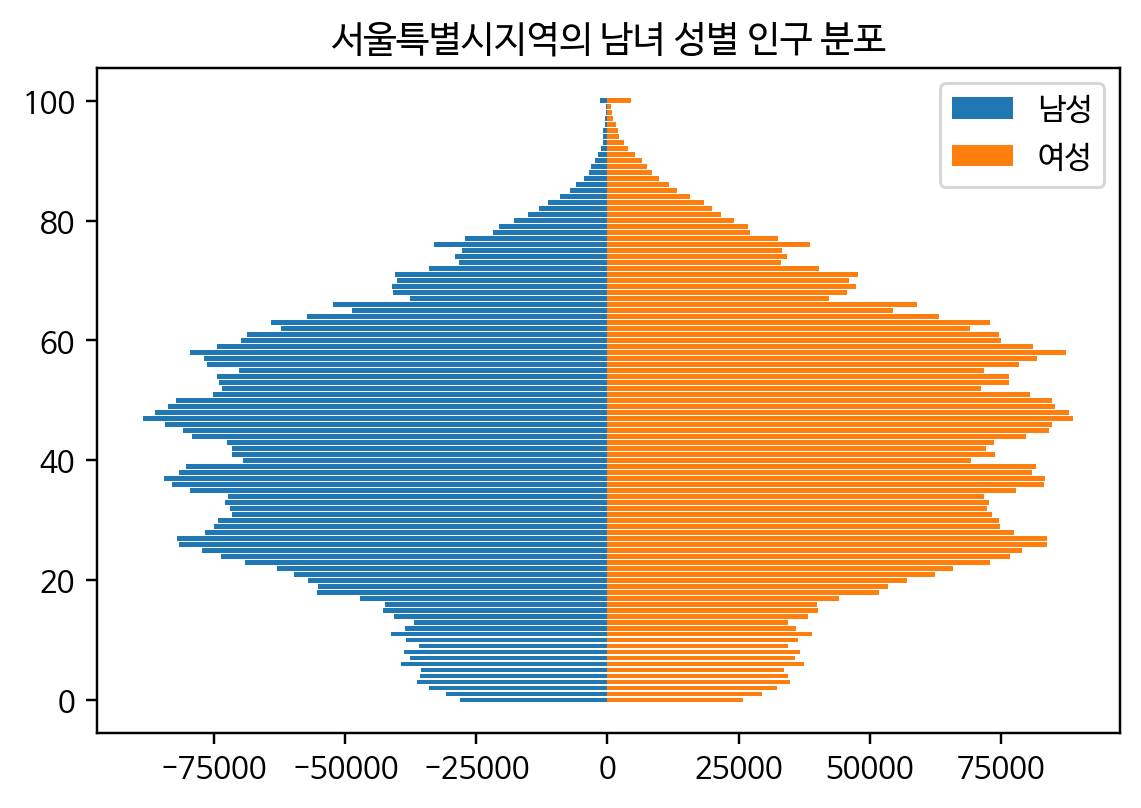

In [10]:
f = open('/content/gender.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

m = []
f = []
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')

for row in data:
  if name in row[0]:
    for i in row[3:104]:    # 남성 : 3 ~ 103번 데이터 슬라이싱 - 정수 데이터로 변환 - 리스트에 저장
      m.append(-int(i.replace(',', '')))
    for b in row[106:]:
      f.append(int(b.replace(',', '')))      # 여성 : 106 ~ 끝까지 데이터 슬라이싱 ''
    break   # 첫번 째 찾고 for문 중단

plt.figure(dpi = 110)
plt.title(name+'지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label = '남성')
plt.barh(range(101), f, label = '여성')
plt.legend()
plt.show

In [11]:
print(len(m), len(f))

101 101


항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 </br>
but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie

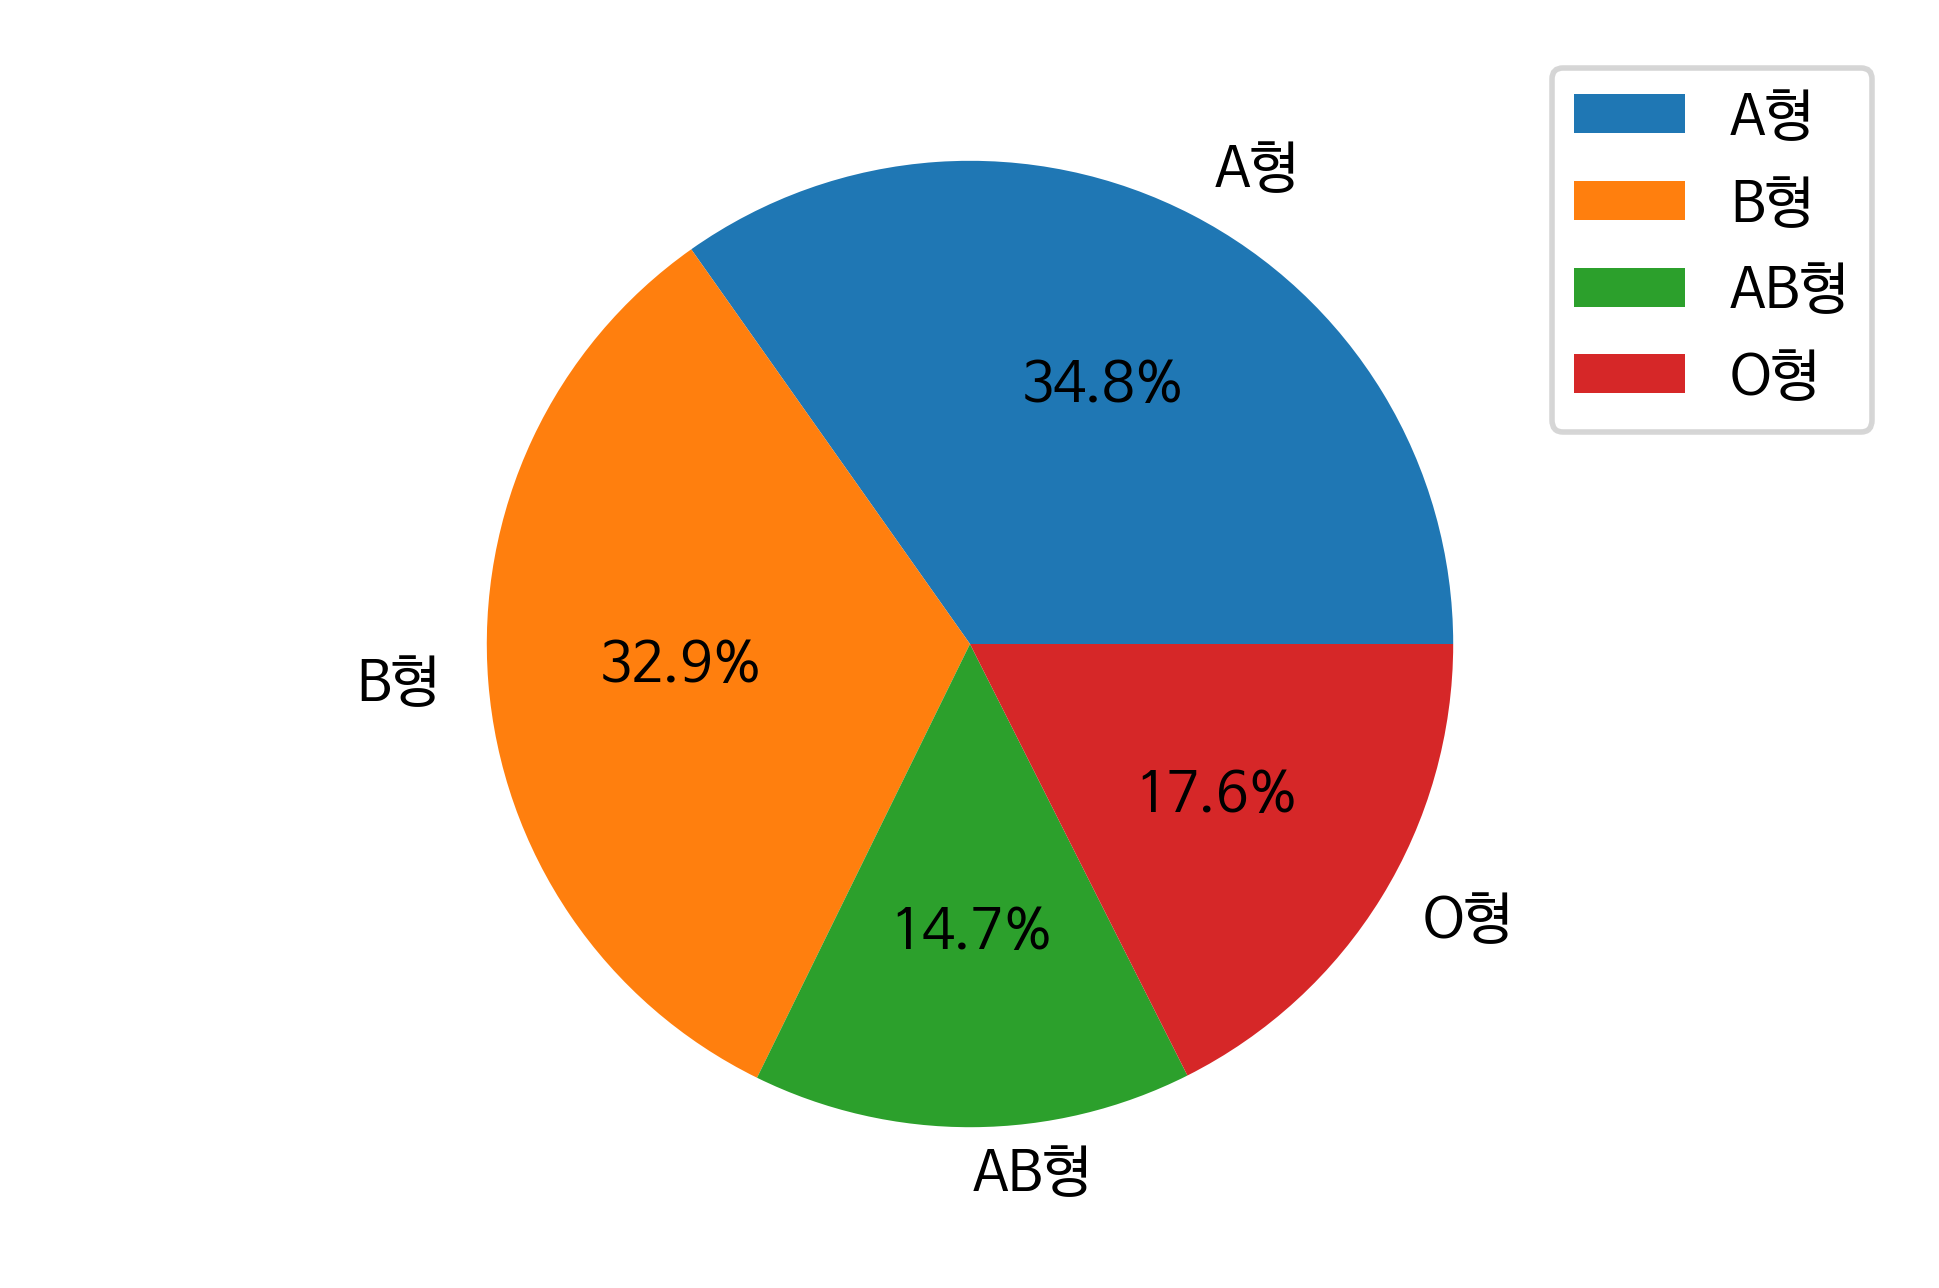

In [24]:
plt.figure(dpi = 200)
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%') # pie(x)가 가지고 있는 값을 비율로 표시..... x,y 값...autopct = 차트 안에 숫자 표현
plt.legend()
plt.show()

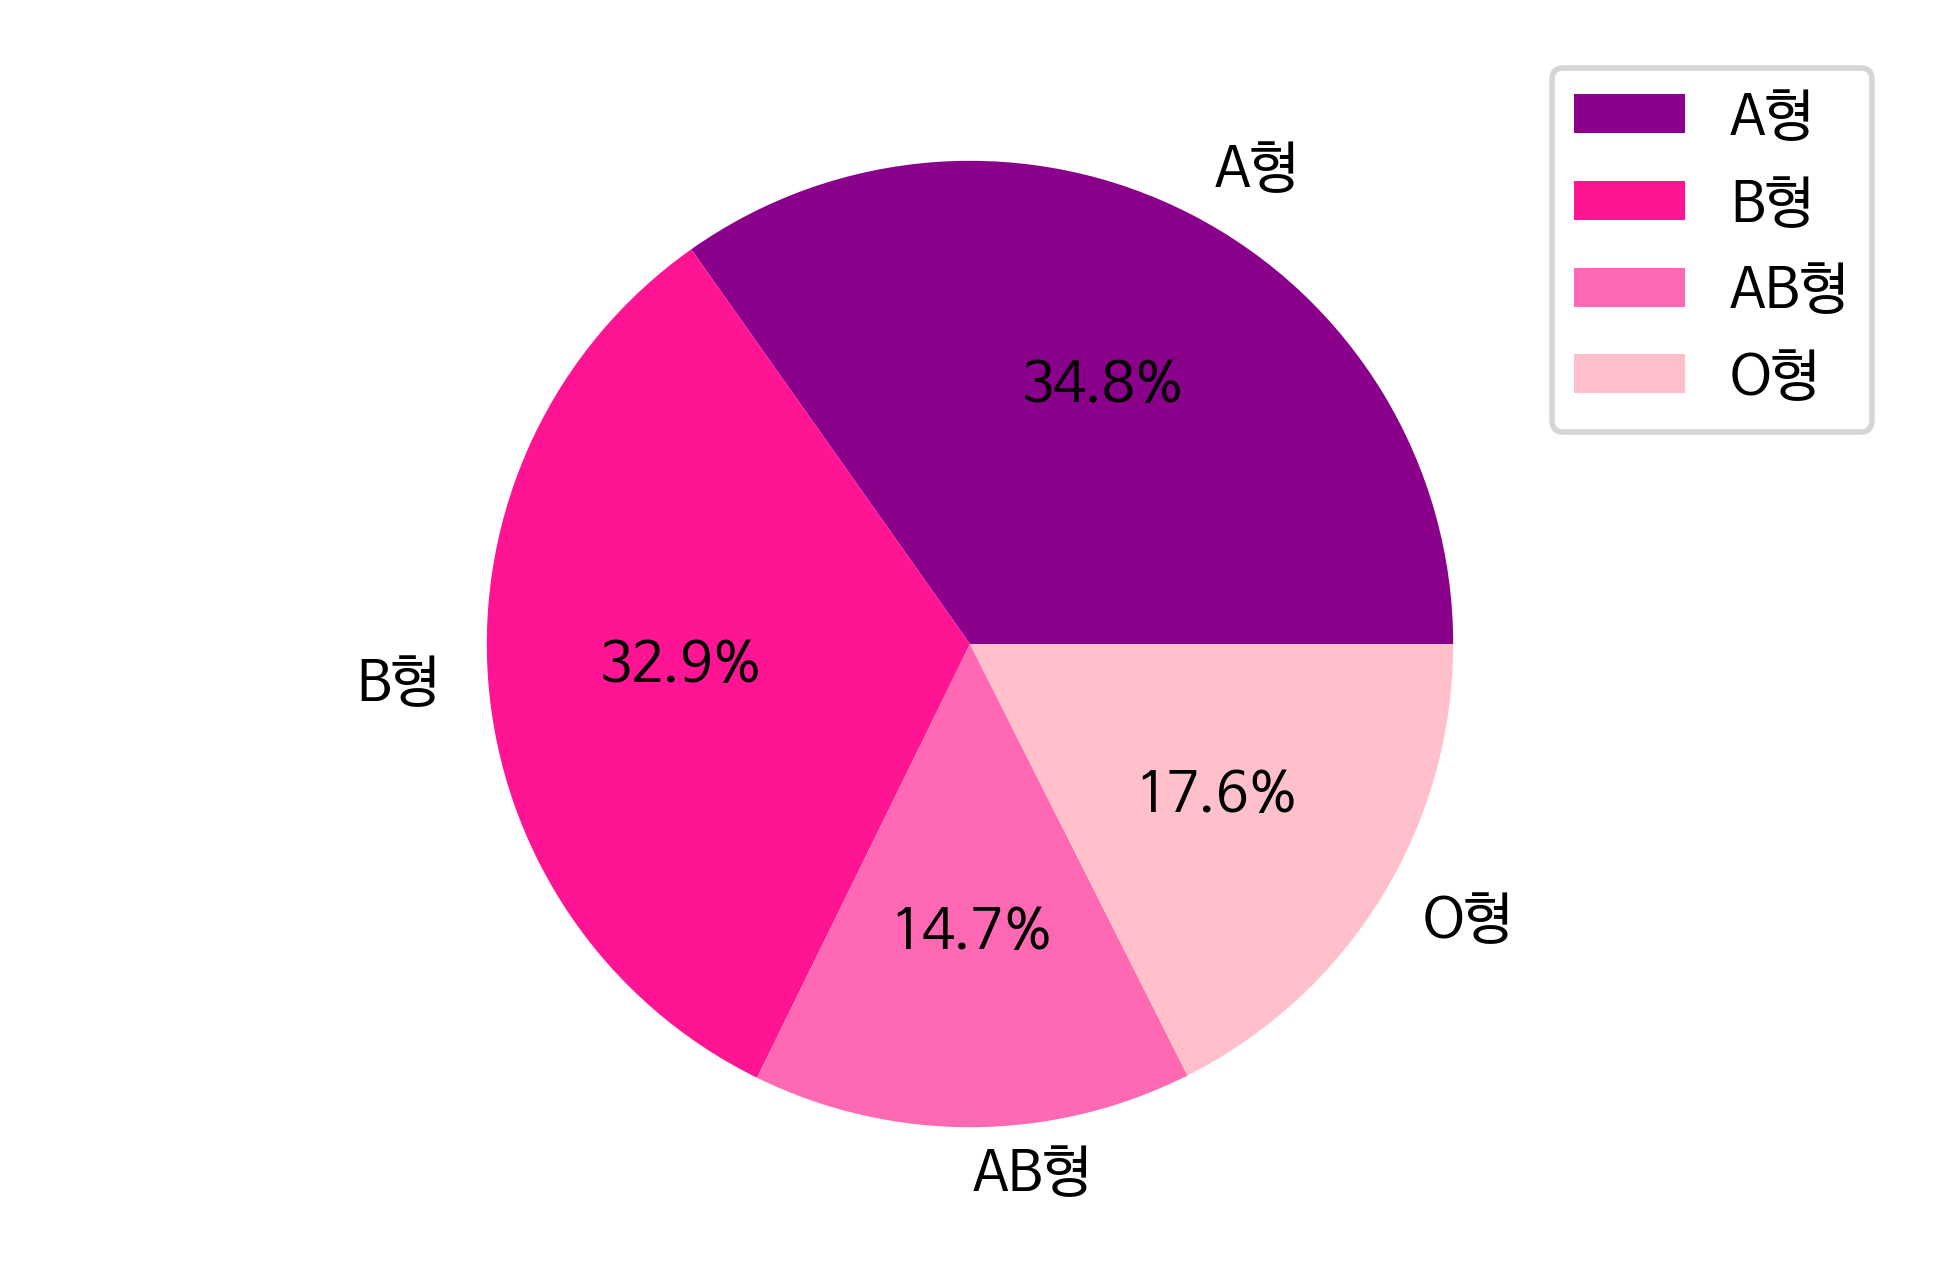

In [25]:
plt.figure(dpi = 200)
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, labels = label, colors = color, autopct = '%.1f%%') # pie(x)가 가지고 있는 값을 비율로 표시..... x,y 값...autopct = 차트 안에 숫자 표현
plt.legend()
plt.show()

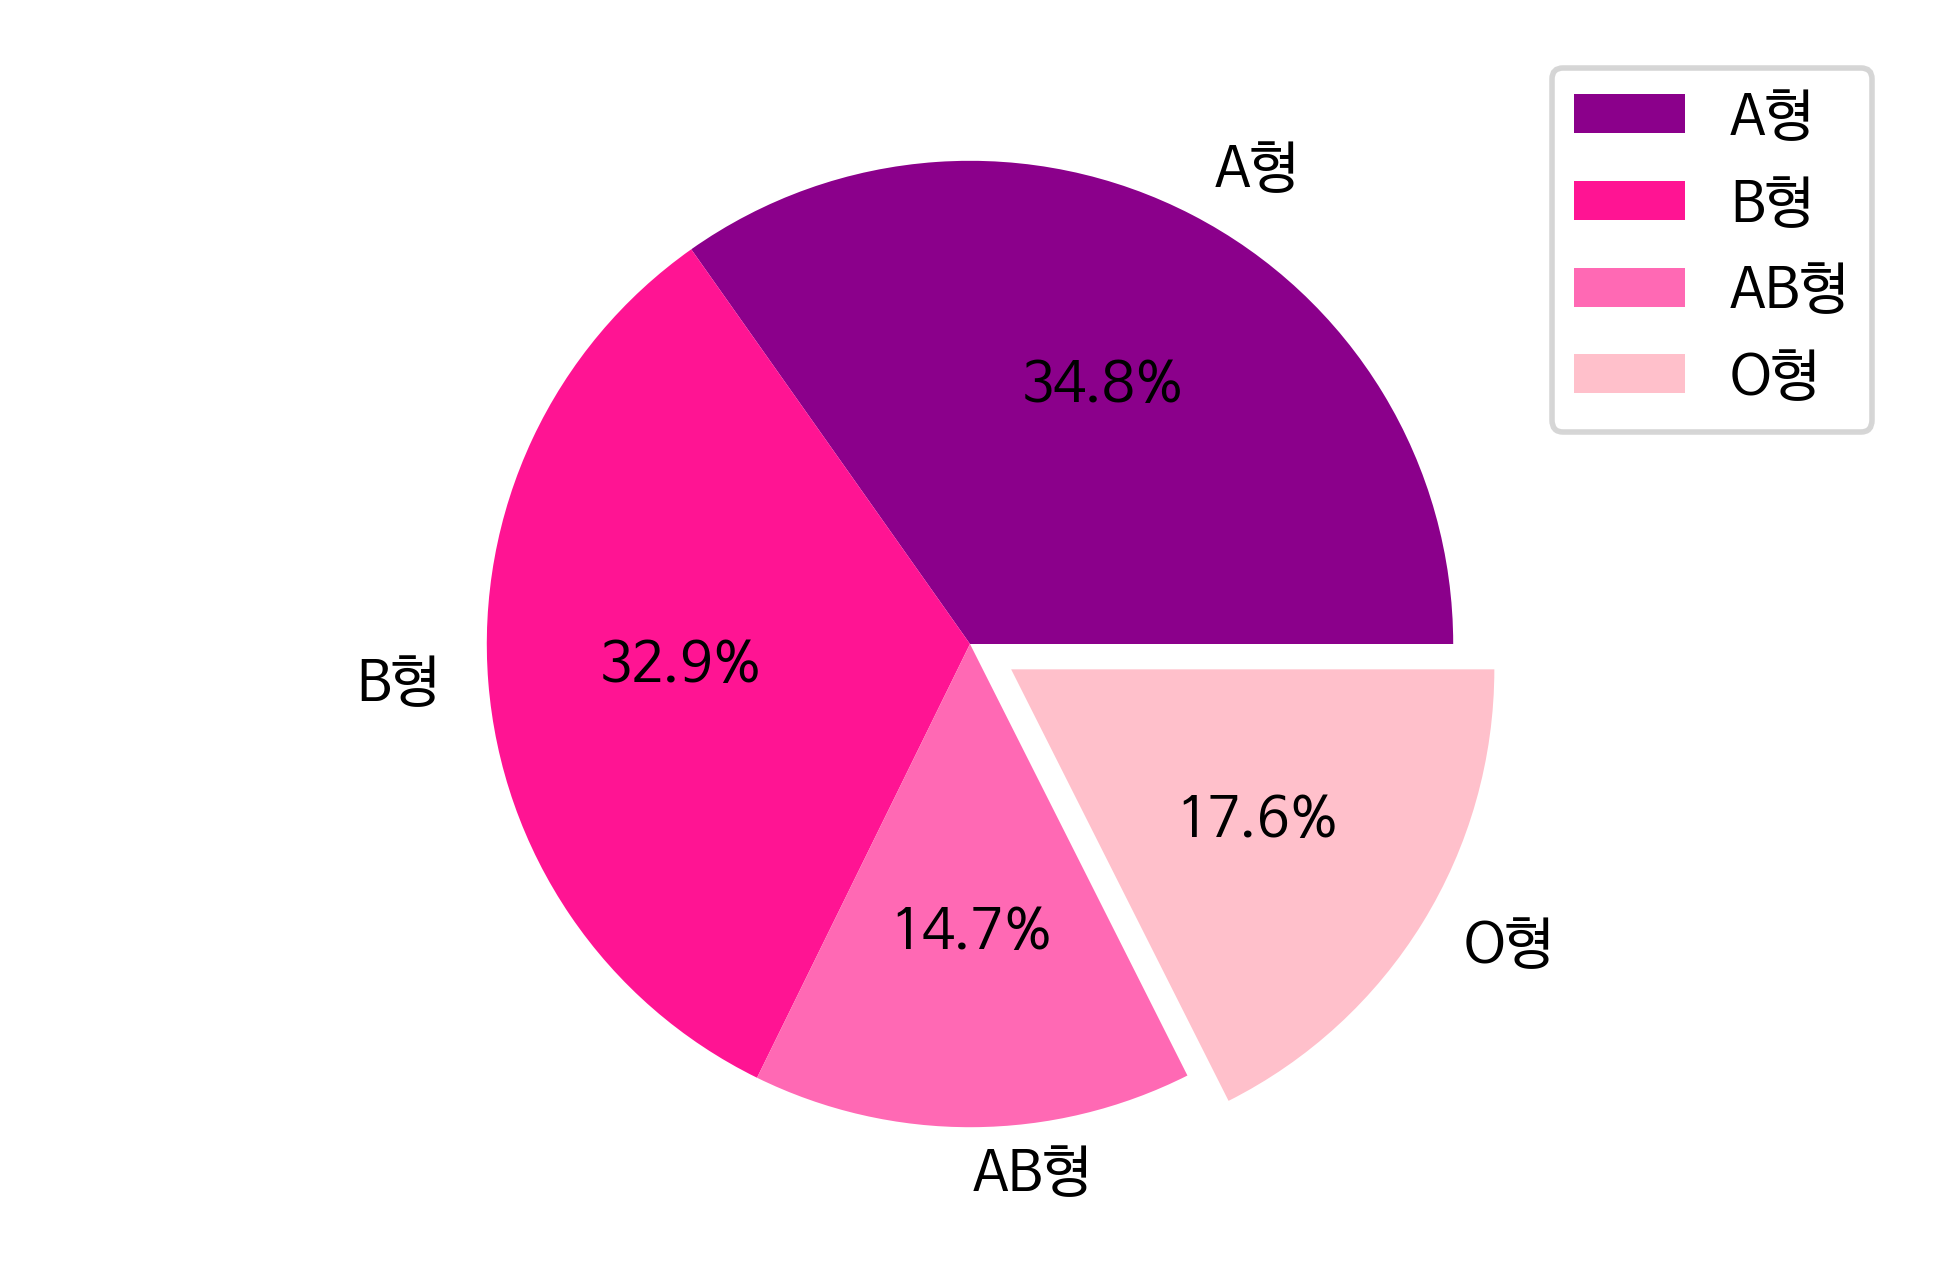

In [29]:
plt.figure(dpi = 200)
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, labels = label,autopct = '%.1f%%', explode=(0, 0, 0, 0.1), colors = color) # pie(x)가 가지고 있는 값을 비율로 표시..... x,y 값...autopct = 차트 안에 숫자 표현
plt.legend()
plt.show()

하단보다는 측면이 보기 더 좋다

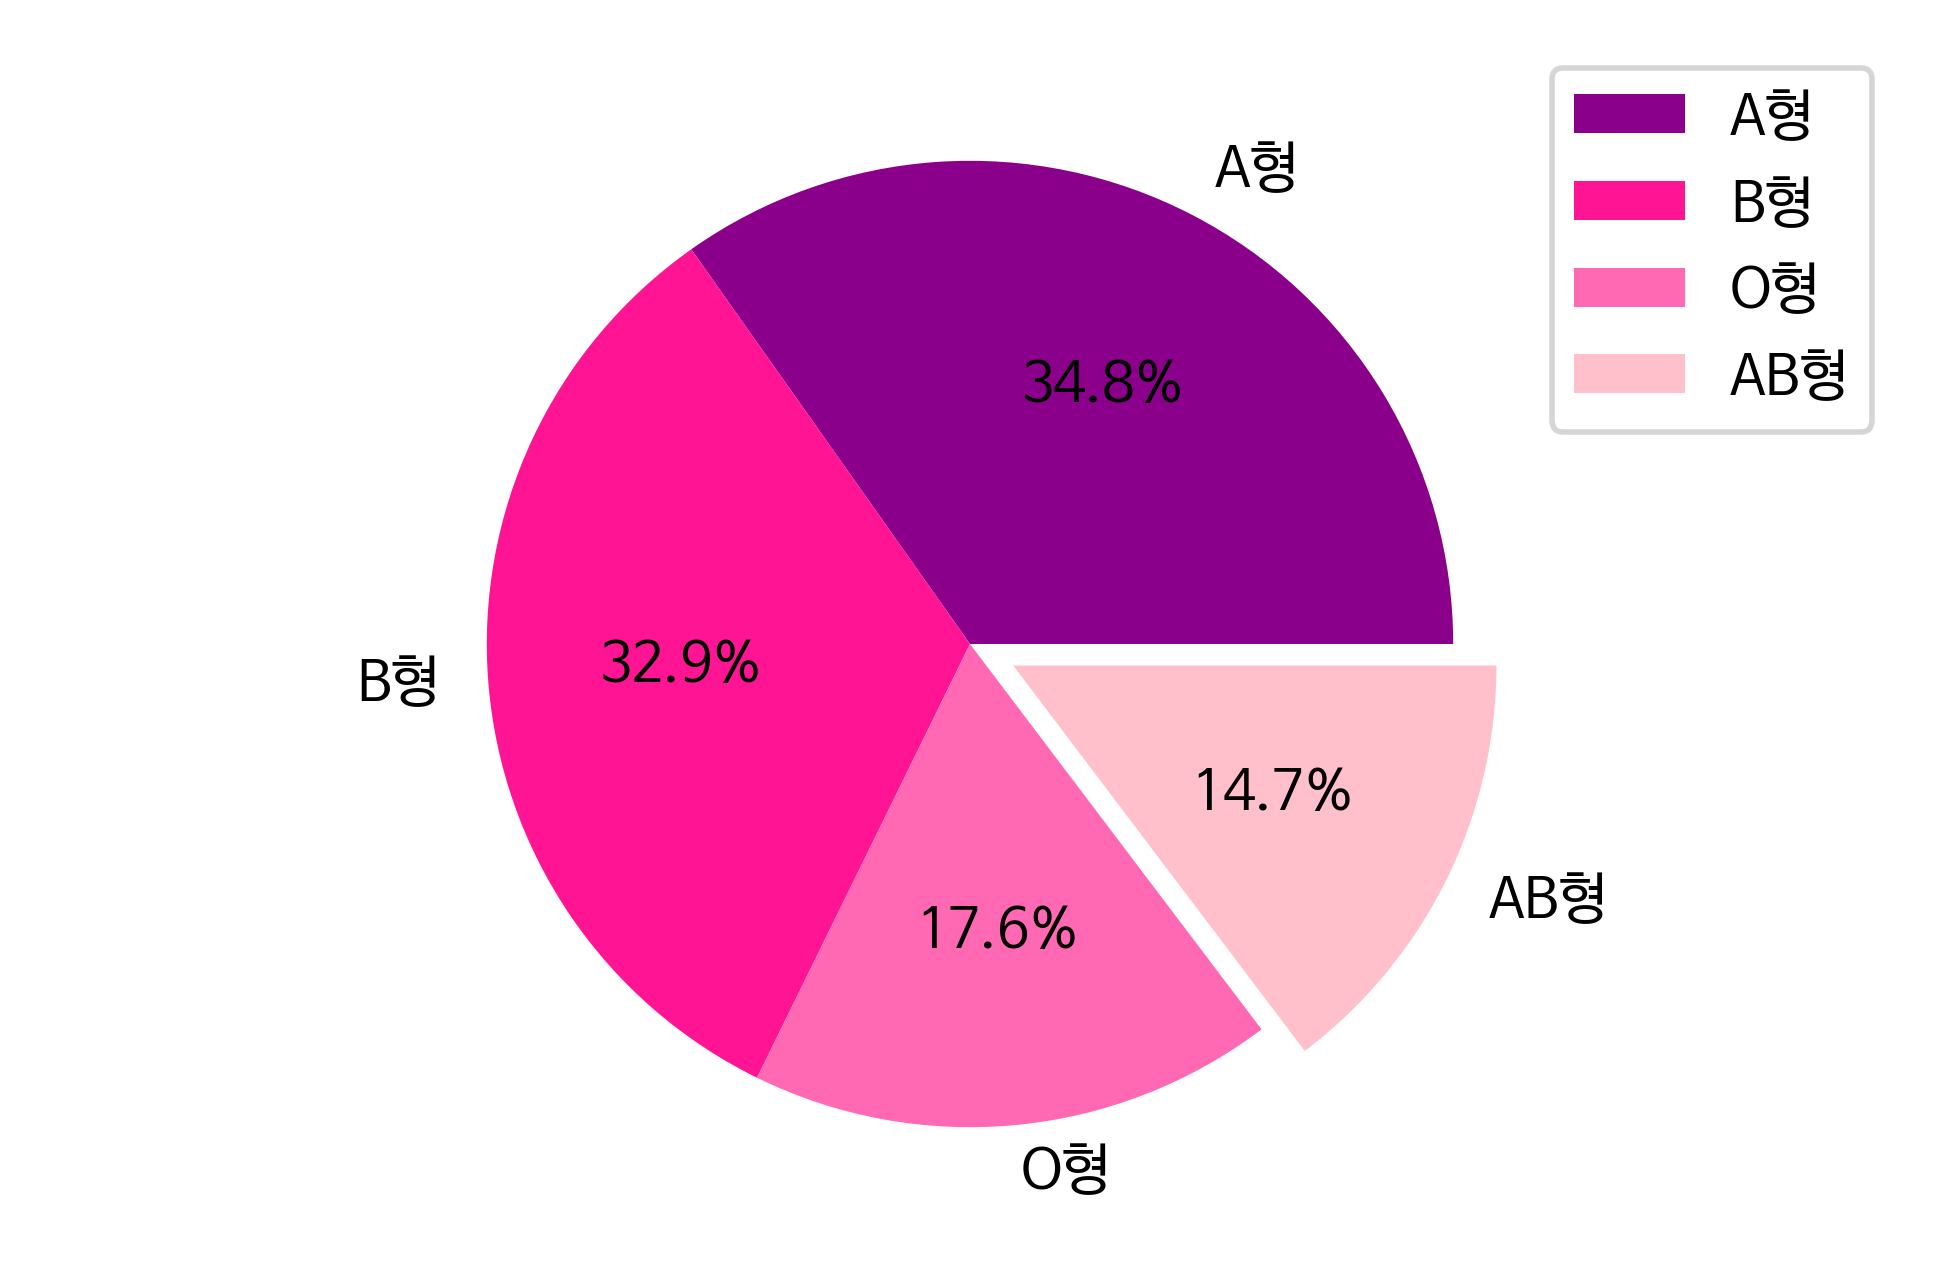

In [31]:
plt.figure(dpi = 200)
size = [2441, 2312, 1233, 1031]
label = ['A형', 'B형', 'O형', 'AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, labels = label,autopct = '%.1f%%', explode=(0, 0, 0, 0.1), colors = color) # pie(x)가 가지고 있는 값을 비율로 표시..... x,y 값...autopct = 차트 안에 숫자 표현
plt.legend()
plt.show()

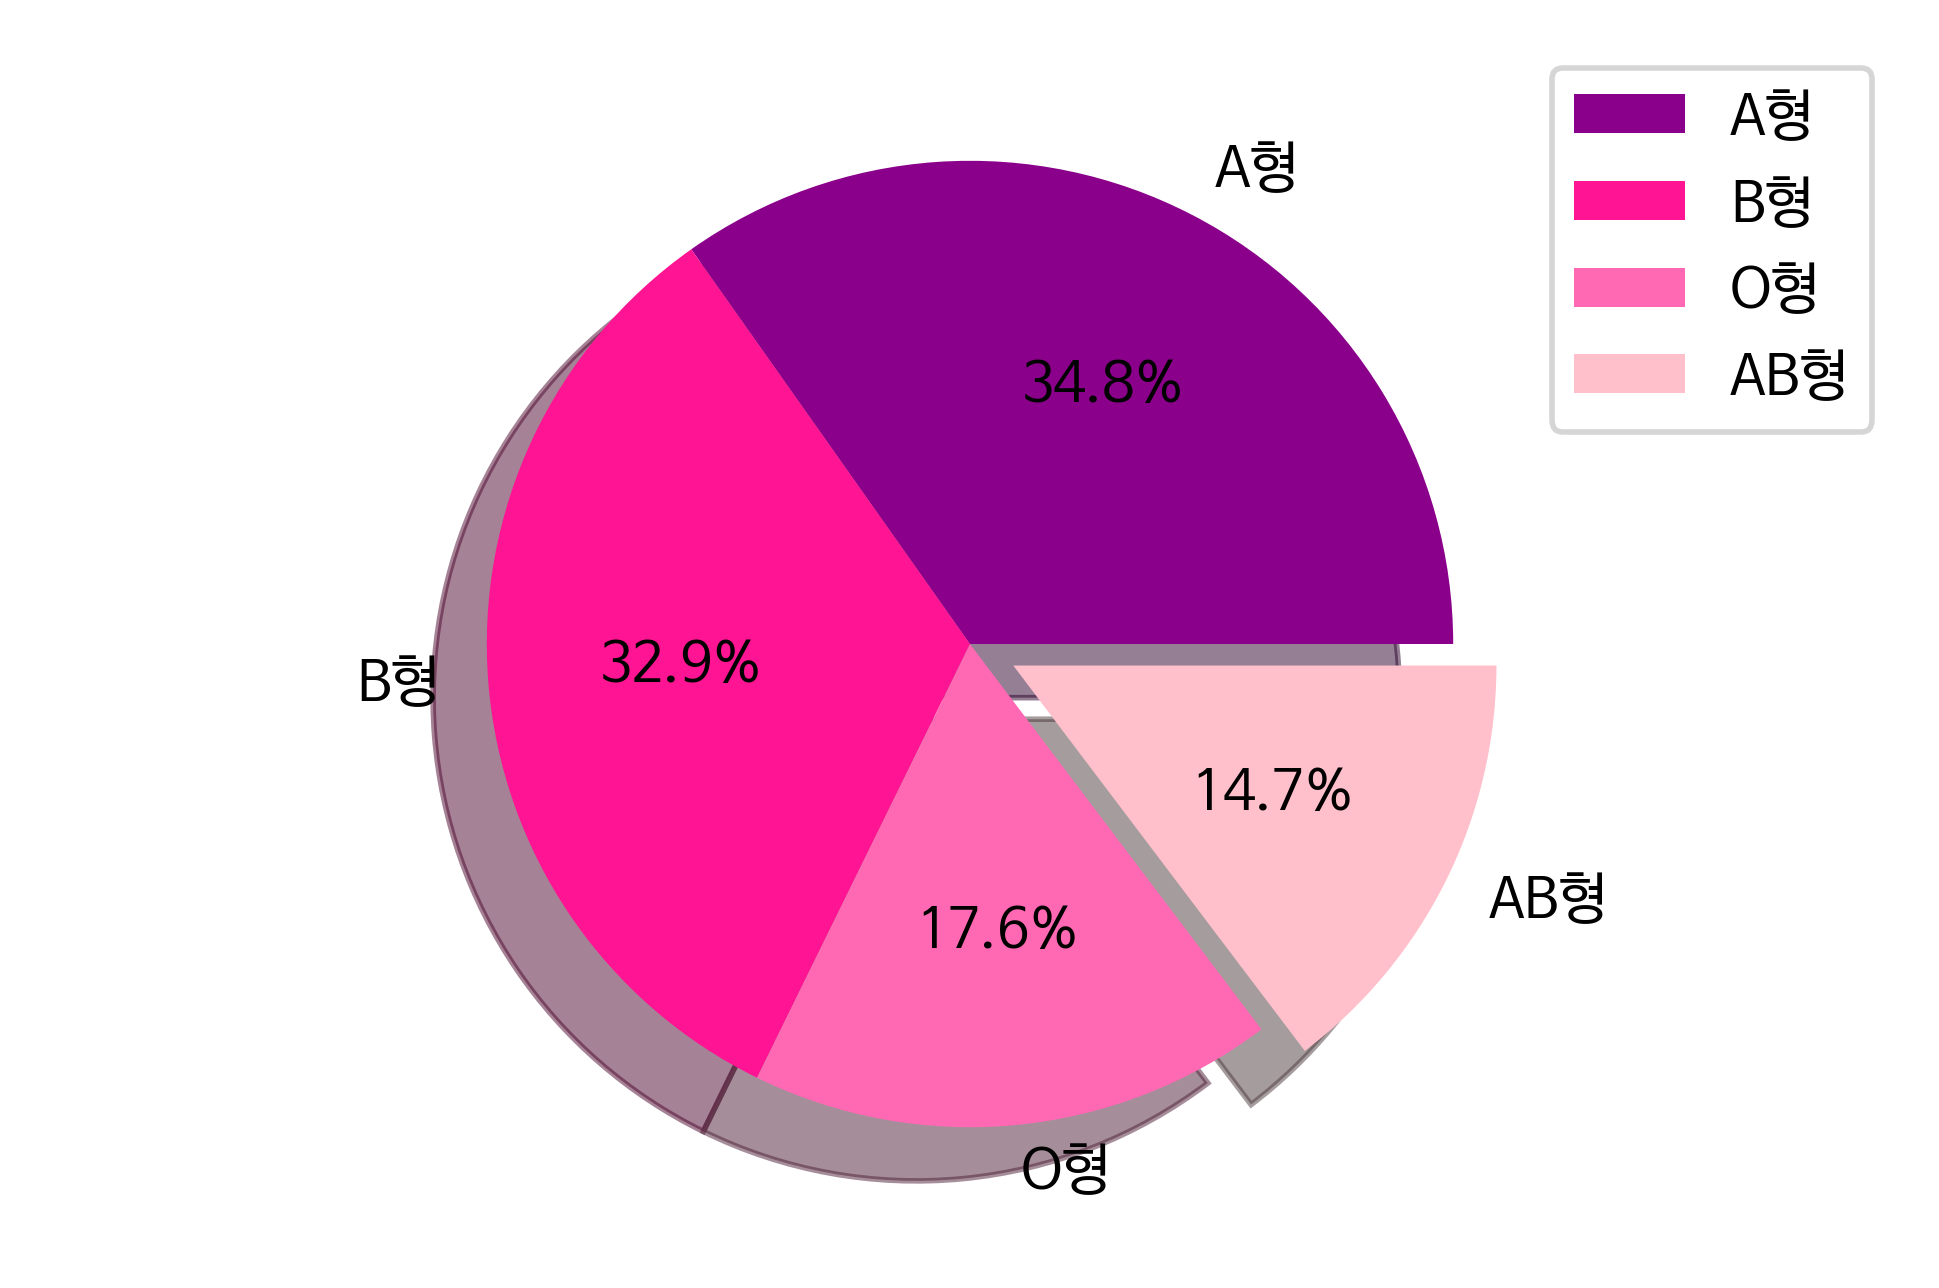

In [32]:
plt.figure(dpi = 200)
size = [2441, 2312, 1233, 1031]
label = ['A형', 'B형', 'O형', 'AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, labels = label,autopct = '%.1f%%', explode=(0, 0, 0, 0.1), colors = color, shadow = True) # pie(x)가 가지고 있는 값을 비율로 표시..... x,y 값...autopct = 차트 안에 숫자 표현
plt.legend()
plt.show()

제주도의 성별 인구 비율 표현하기

찾고 싶은 지역의 이름을 알려주세요 : 제주특별자치도


<function matplotlib.pyplot.show>

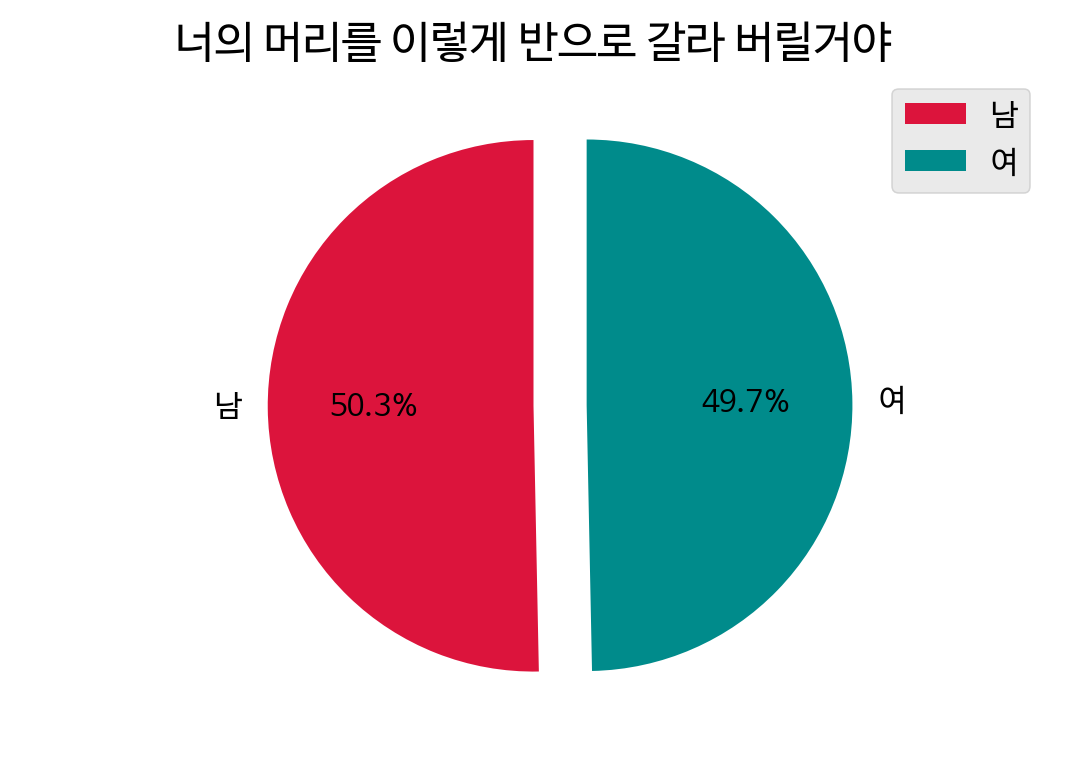

In [45]:
f = open('/content/gender.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

size = [] # 제주조의 남성 인구 합계, 여성 인구 합계
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')

for row in data:
  if name in row[0]:
    m = 0 # 남성 인구수 합계 변수
    f = 0 # 여성 인구수 합계 변수
    for i in range(101):
      m += int(row[3+i].replace(',', ''))
      f += int(row[106+i].replace(',', ''))
    break   # 첫번 째 찾고 for문 중단

size.append(m)
size.append(f)

# 파이차트 시각화
plt.figure(dpi = 110)
color = ['crimson', 'darkcyan']
label = ['남', '여']
plt.title('너의 머리를 이렇게 반으로 갈라 버릴거야')
plt.axis('equal')
plt.style.use('ggplot')
plt.pie(size, labels = label, autopct = '%.1f%%', colors = color, explode = (0, 0.2), startangle = 90)
plt.legend()
plt.show